# 【問題1】コンペティション内容の確認

### 【①何を学習し、何を予測するのか】
#### ➡︎　顧客データを基に　返済能力を予測する

### 【②どのようなファイルを作りKaggleに提出するか】<br>
#### ➡︎application_test.csvに対してpredict_probaによって推測を行ったデータと、<br>sample_submission.csvにあるSK_ID_CURRをDF化し、CSVに変換して提出する。（sample_submission.csv参照）

### 【③提出されたものはどういった指標値で評価されるのか】<br>
#### ➡︎予測された確率と観測されたターゲットの間のROC曲線の下の領域の大きさ

# 【問題2】学習と検証

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matpsalotlib inline
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

## 〜分析〜

In [3]:
train = pd.read_csv("/Users/nobu/Documents/データセット/home-credit-default-risk/application_train.csv")

train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:
print("say_hello")

say_hello


In [4]:
#　objectデータだけ抜き出す
train.select_dtypes(include=object).head(100)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [5]:
#ラベルだけ抜き出す
object_label = train.select_dtypes(include=object).columns
object_label

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [6]:
#抜き出したカテゴリ型の特徴量をエンコーディングし元のtrainデータに置き換える
import category_encoders as ce
encode_data = ce.OrdinalEncoder(cols=list(object_label),handle_unknown='impute')
train_df = encode_data.fit_transform(train)

train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,1,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1,1.0,2,2,1,10,0,0,0,0,0,0,1,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,1,1,0.0149,1,1,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,2,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2,2.0,1,1,2,11,0,0,0,0,0,0,2,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,1,1,0.0714,2,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,1,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1,1.0,2,2,2,9,0,0,0,0,0,0,3,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,1,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,1,2.0,2,2,1,17,0,0,0,0,0,0,1,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER
TARGET,1.000000,-0.178919,-0.160472,-0.155317,0.078239,0.060893,0.058899,-0.057020,0.055218,-0.054718
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846,-0.205478,-0.012158,-0.012903,0.089802,-0.075256,0.022992
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982,-0.091996,-0.288299,-0.292895,0.043663,-0.195764,0.014629
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000,-0.600610,-0.115374,-0.115341,0.240876,-0.132607,0.306724
DAYS_BIRTH,0.078239,-0.205478,-0.091996,-0.600610,1.000000,0.008073,0.009361,-0.460824,0.082939,-0.148037
REGION_RATING_CLIENT_W_CITY,0.060893,-0.012158,-0.288299,-0.115374,0.008073,1.000000,0.950842,-0.066775,0.025717,0.017299
REGION_RATING_CLIENT,0.058899,-0.012903,-0.292895,-0.115341,0.009361,0.950842,1.000000,-0.074449,0.026022,0.017895
NAME_INCOME_TYPE,-0.057020,0.089802,0.043663,0.240876,-0.460824,-0.066775,-0.074449,1.000000,0.006877,0.128615
DAYS_LAST_PHONE_CHANGE,0.055218,-0.075256,-0.195764,-0.132607,0.082939,0.025717,0.026022,0.006877,1.000000,-0.025276
CODE_GENDER,-0.054718,0.022992,0.014629,0.306724,-0.148037,0.017299,0.017895,0.128615,-0.025276,1.000000


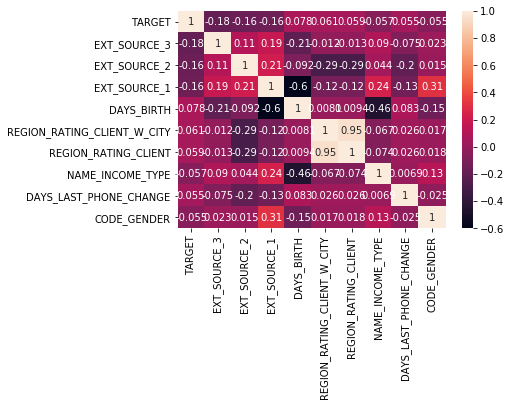

In [7]:
#train_dfの中でTARGETとの相関係数が強い（負も含む）上位10項目のインデックスを抽出
target_corr_index = train_df.corr()["TARGET"].abs().nlargest(10).index


#train_dfの抽出したインデックスで相関係数を算出
target_corr_top10 = train_df[target_corr_index].corr()

display(target_corr_top10)
sns.heatmap(target_corr_top10,annot=True)

In [8]:
#train_dfで相関が強い上位１０項目でDF作成
try_df = train_df[target_corr_index]
display(try_df)

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER
0,1,0.139376,0.262949,0.083037,-9461,2,2,1,-1134.0,1
1,0,NaN,0.622246,0.311267,-16765,1,1,2,-828.0,2
2,0,0.729567,0.555912,NaN,-19046,2,2,1,-815.0,1
3,0,NaN,0.650442,NaN,-19005,2,2,1,-617.0,2
4,0,NaN,0.322738,NaN,-19932,2,2,1,-1106.0,1
...,...,...,...,...,...,...,...,...,...,...
307506,0,NaN,0.681632,0.145570,-9327,1,1,1,-273.0,1
307507,0,NaN,0.115992,NaN,-20775,2,2,4,0.0,2
307508,0,0.218859,0.535722,0.744026,-14966,3,3,1,-1909.0,2
307509,1,0.661024,0.514163,NaN,-11961,2,2,3,-322.0,2


In [9]:
#欠損値の数を見る
total = try_df.isnull().sum()
miss_ratio = round(total/307511*100)
total_df = pd.DataFrame(total,columns=["missing_total"])
ratio_df = pd.DataFrame(miss_ratio,columns=["missing_ratio(%)"])
missing_data = pd.concat([total_df,ratio_df],axis=1)

display(missing_data)

,missing_total,missing_ratio(%)
TARGET,0,0.0
EXT_SOURCE_3,60965,20.0
EXT_SOURCE_2,660,0.0
EXT_SOURCE_1,173378,56.0
DAYS_BIRTH,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
REGION_RATING_CLIENT,0,0.0
NAME_INCOME_TYPE,0,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0
CODE_GENDER,0,0.0


In [10]:
#欠損値を削除
try_df = try_df.dropna()

## 〜前処理〜

In [11]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1","DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY",
                   "REGION_RATING_CLIENT","NAME_INCOME_TYPE","DAYS_LAST_PHONE_CHANGE","CODE_GENDER"]].values
y = try_df["TARGET"].values


In [12]:
#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

In [13]:
#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

## 〜学習・推定〜

In [14]:
#学習
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(std_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
#推定
knn1_pred = knn1.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める
knn1_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [16]:
#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
knn1_rate = knn1_pred[:,1:].flatten()
knn1_rate

array([0., 0., 0., ..., 0., 0., 0.])

## 〜ROCを求める〜

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn1_rate)

0.5346746200488227

# 【問題3】テストデータに対する推定

In [18]:
test = pd.read_csv("/Users/nobu/Documents/データセット/home-credit-default-risk/application_test.csv")
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [19]:
test.shape
#testデータではTARGET(目的変数)が無い

(48744, 121)

In [20]:
#trainデータ同様カテゴリ変数をエンコーディング
encode_test_data = ce.OrdinalEncoder(cols=list(object_label),handle_unknown='impute')
test_data = encode_test_data.fit_transform(test)
test_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,1,1,1,1,0,135000.0,568800.0,20560.5,450000.0,1,1,1,1,1,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,1,2.0,2,2,1,18,0,0,0,0,0,0,1,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,1,1,0.0392,1,1,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,1,2,1,1,0,99000.0,222768.0,17370.0,180000.0,1,1,2,1,1,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,2,2.0,2,2,2,9,0,0,0,0,0,0,2,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,2,2,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,1,2,2,1,0,202500.0,663264.0,69777.0,630000.0,2,1,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,3,2.0,2,2,3,14,0,0,0,0,0,0,3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,2,2,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,1,1,1,1,2,315000.0,1575000.0,49018.5,1575000.0,1,1,2,1,1,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,4,4.0,2,2,4,11,0,0,0,0,0,0,4,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042,0.2404,0.3673,0.0386,0.0800,0.3109,0.2049,0.9970,0.9608,0.1176,0.3222,0.2759,0.3750,0.0417,0.2089,0.2626,0.3827,0.0389,0.0847,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.3750,0.0417,0.2078,0.244

In [21]:
#trainデータで用いた特徴量をtestデータでも抽出
test_df = test_data.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1","DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY",
                   "REGION_RATING_CLIENT","NAME_INCOME_TYPE","DAYS_LAST_PHONE_CHANGE","CODE_GENDER"]]
test_df.shape
test_df

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER
0,0.159520,0.789654,0.752614,-19241,2,2,1,-1740.0,1
1,0.432962,0.291656,0.564990,-18064,2,2,1,0.0,2
2,0.610991,0.699787,NaN,-20038,2,2,1,-856.0,2
3,0.612704,0.509677,0.525734,-13976,2,2,1,-1805.0,1
4,NaN,0.425687,0.202145,-13040,2,2,1,-821.0,2
...,...,...,...,...,...,...,...,...,...
48739,0.643026,0.648575,NaN,-19970,3,3,1,-684.0,1
48740,NaN,0.684596,NaN,-11186,2,2,4,0.0,1
48741,0.283712,0.632770,0.733503,-15922,2,2,4,-838.0,1
48742,0.595456,0.445701,0.373090,-13968,2,2,4,-2308.0,2


In [22]:
#欠損値を中央値埋め
test_df = test_df.fillna(test_df.median())
test_df.isnull().sum()

EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
EXT_SOURCE_1                   0
DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
NAME_INCOME_TYPE               0
DAYS_LAST_PHONE_CHANGE         0
CODE_GENDER                    0
dtype: int64

In [23]:
test_df

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER
0,0.159520,0.789654,0.752614,-19241,2,2,1,-1740.0,1
1,0.432962,0.291656,0.564990,-18064,2,2,1,0.0,2
2,0.610991,0.699787,0.506771,-20038,2,2,1,-856.0,2
3,0.612704,0.509677,0.525734,-13976,2,2,1,-1805.0,1
4,0.519097,0.425687,0.202145,-13040,2,2,1,-821.0,2
...,...,...,...,...,...,...,...,...,...
48739,0.643026,0.648575,0.506771,-19970,3,3,1,-684.0,1
48740,0.519097,0.684596,0.506771,-11186,2,2,4,0.0,1
48741,0.283712,0.632770,0.733503,-15922,2,2,4,-838.0,1
48742,0.595456,0.445701,0.373090,-13968,2,2,4,-2308.0,2


In [24]:
#testデータで推定
knn1_pred = knn1.predict_proba(test_df)

In [25]:
#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
submit_rate = knn1_pred[:,1:].flatten()

## 提出ファイルの作成

In [26]:
submission =pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': submit_rate})
submission.to_csv('home_credit1.csv', index=False)

### score ➡︎　0.57674

# 【問題4】特徴量エンジニアリング

### ①特徴量を相関係数の高い上位３つ（EXT_SOURSE1~3）に絞る（最近傍法）

In [27]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(std_X_train, y_train)

#推定
knn1_pred = knn1.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
knn1_rate = knn1_pred[:,1:].flatten()
knn1_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn1_rate)

0.5360681549728326

#### ➡︎特徴量９個全てを入れるよりも高い

### ②特徴量を相関係数の低い３つ<br>（NAME_INCOME_TYPE	DAYS_LAST_PHONE_CHANGE	CODE_GENDER）に絞る

In [27]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["NAME_INCOME_TYPE","DAYS_LAST_PHONE_CHANGE","CODE_GENDER"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(std_X_train, y_train)

#推定
knn1_pred = knn1.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
knn1_rate = knn1_pred[:,1:].flatten()
knn1_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn1_rate)

0.5072938617213955

#### ➡︎EXT_SOURSEを入れないと低い

### ③nn=5にする（他は②と同条件）

In [28]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["NAME_INCOME_TYPE","DAYS_LAST_PHONE_CHANGE","CODE_GENDER"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(std_X_train, y_train)

#推定
knn5_pred = knn5.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
knn5_rate = knn5_pred[:,1:].flatten()
knn5_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn5_rate)

0.5147809866918656

#### ➡︎わずかに上がる

### ④ロジスティック回帰を使う（他の条件は①）

In [29]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.linear_model import LogisticRegression
LR =  LogisticRegression()
LR.fit(std_X_train, y_train)

#推定
LR_pred = LR.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
LR_rate = LR_pred[:,1:].flatten()
LR_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LR_rate)

0.7393135483108906

#### ➡︎①よりも0.2上がった

### ⑤決定木

In [30]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(std_X_train, y_train)

#推定
clf_pred = clf.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
clf_rate = clf_pred[:,1:].flatten()
clf_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_rate)

0.5311210922119852

#### ➡︎最近傍法のnn=1とほとんど変わらない

### ⑥ランダムフォレスト

In [31]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(std_X_train, y_train)

#推定
rfc_pred = rfc.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
rfc_rate = rfc_pred[:,1:].flatten()
rfc_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rfc_rate)

0.6814955213008899

#### ➡︎ロジスティックの次に高い

## ・最も高かった相関係数の高い上位３つとロジスティック回帰でkaggleに提出

In [32]:
# 特徴量と目的変数に分け、それぞれをndarrayに変換
X = try_df.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]
y = try_df["TARGET"].values


#訓練用75%と検証用25%に分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#特徴量を標準化
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

std_X_train = std.transform(X_train)
std_X_test = std.transform(X_test)

#学習
from sklearn.linear_model import LogisticRegression
LR =  LogisticRegression()
LR.fit(std_X_train, y_train)

#推定
LR_pred = LR.predict_proba(std_X_test)#predict_probaは各データがそれぞれのクラスに所属する確率を求める

#ROCを求めるのに適合させるためにknn１_predの確率の部分を１次元に変換
LR_rate = LR_pred[:,1:].flatten()
LR_rate

#ROCを求める
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LR_rate)

test_df = test_data.loc[:,["EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1"]]

test_df = test_df.fillna(test_df.median())


LR_pred = LR.predict_proba(test_df)

submit_rate = LR_pred[:,1:].flatten()

submission =pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': submit_rate})
submission.to_csv('home_credit2.csv', index=False)

### SCORE➡︎0.70877

In [1]:
import ptvsd

In [2]:
!jupyter labextension install @jupyterlab/git
!pip install jupyterlab-git
!jupyter serverextension enable --py jupyterlab_git

Building jupyterlab assets (build:prod:minimize)
     |████████████████████████████████| 209 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 451 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.9 MB/s eta 0:00:011
Enabling: jupyterlab_git
- Writing config: /Users/nobu/.jupyter
    - Validating...
      jupyterlab_git 0.20.0 OK
